# Optimization via Gradient Descent (GD)

You are asked to implement the GD method in Python and to test it with some exemplar functions. In particular:

- Write a script that implement the GD algorithm with fixed step size (i.e. no backtracking), with the input-output structure discussed in the first Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).
- Write a script that implement the GD algorithm with backtracking, with the input-output structure discussed in the second Exercise of the Gradient Descent section (https://devangelista2.github.io/statistical-mathematical-methods/Optimization/GD.html).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Functions and gradients definition

First of all, we need two functions to define the $f(x)$ and the $\nabla f(x)$.

In [2]:
# define the 5 functions
# first two functions
x0 = np.zeros((2,))

# third and fourth function
def computing_vandermonde(n):
    v = np.linspace(0, 1, n)
    A = np.vander(v, increasing=True)
    x_star = np.ones((n,))
    b = A@x_star

    lam = 0.5
    return A, b, lam

# define f1
def f_1(x, n=0):
    x1 = x[0]
    x2 = x[1]
    return (x1 - 3)**2 + (x2 - 1)**2

# define f2
def f_2(x, n=0):
    x1 = x[0]
    x2 = x[1]
    return 10*(x1 - 1)**2 + (x2 - 2)**2

# define f3
def f_3(x, n):
    A, b, lam = computing_vandermonde(n)
    return 0.5*np.linalg.norm(A@x - b, 2)**2
    
# define f4
def f_4(x, n):
    A, b, lam = computing_vandermonde(n)
    return 0.5*(np.linalg.norm(A@x - b, 2)**2) + (lam/2) * ((np.linalg.norm(x, 2))**2)

# define f5
def f_5(x, n=0):
    return x**4 + x**3 - 2 * (x**2) - 2 * x

In [3]:
# define f1 gradient
def grad_f1(x, n=0):
    x1 = x[0]
    x2 = x[1]
    return np.array([2 * (x1 - 3),  2 * (x2 - 1)])

# define f2 gradient
def grad_f2(x, n=0):
    x1 = x[0]
    x2 = x[1]
    return np.array([20 * (x1 - 1), 2 * (x2 - 2)])

# define f3 gradient
def grad_f3(x, n):
    A, b, lam = computing_vandermonde(n)
    return A.T @ (A @ x - b)

# define f4 gradient
def grad_f4(x, n):
    A, b, lam = computing_vandermonde(n)
    return A.T @ (A @ x - b) + lam * x

# define f5 gradient
def grad_f5(x, n=0):
    return 4 * (x**3) + 3 * (x**2) - 4 * (x) - 2

## GD algorithm without backtracking
Once the functions and the relative gradients are defined, we can define the GD algorithm.

In [4]:
def GD(f, grad_f, x0, alpha, n=0, maxit=100, tolf=1e-5, tolx=1e-5):
    # initialize the infos
    f_val = np.zeros((maxit+1,))
    grad_norm = np.zeros((maxit+1,))
    
    # set the values of the infos for x0 
    f_val[0] = f(x0, n)
    grad_norm[0] = np.linalg.norm(grad_f(x0, n), 2) 
    
    
    # kernel of the code
    # implement the for loop to update x
    for k in range(maxit):
        x = x0 - alpha*grad_f(x0, n)
        
        # check the infos BEFORE stopping criteria
        f_val[k+1]=f(x, n)
        grad_norm[k+1]=np.linalg.norm(grad_f(x, n), 2)
         
        # stopping criteria 1 and 2 
        if np.linalg.norm(grad_f(x, n), 2) < tolf*grad_norm[0] or np.linalg.norm(x-x0, 2)<tolx:
            break
            
        # update of x0
        x0 = x
        
    # cut off the exceeding values
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]
        
        
    return x, k, f_val, grad_norm

## GD algorithm with backtracking 

### Backtracking algorithm implementation

In [5]:
def backtracking(f, grad_f, x, n=0):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x, n), n) > f(x, n) - c * alpha * np.linalg.norm(grad_f(x, n), 2) ** 2:
        alpha = tau * alpha
    return alpha

In [6]:
def GD_backtracking(f, grad_f, x0, n=0, maxit=100, tolf=1e-5, tolx=1e-5):
    # initialize the infos
    f_val = np.zeros((maxit+1,))
    grad_norm = np.zeros((maxit+1,))
    
    # set the values of the infos for x0 
    f_val[0] = f(x0, n)
    grad_norm[0] = np.linalg.norm(grad_f(x0, n), 2) 
    
    
    # kernel of the code
    # implement the for loop to update x
    for k in range(maxit):
        alpha = backtracking(f, grad_f, x0, n)
        x = x0 - alpha*grad_f(x0, n)
        
        # check the infos BEFORE stopping criteria
        f_val[k+1]=f(x, n)
        grad_norm[k+1]=np.linalg.norm(grad_f(x, n), 2)
         
        # stopping criteria 1 and 2
        if np.linalg.norm(grad_f(x, n), 2) < tolf*grad_norm[0] or np.linalg.norm(x-x0, 2)<tolx:
            break
            
        # update of x0
        x0 = x
        
    # cut off the exeeding values
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]
        
        
    return x, k, f_val, grad_norm, alpha

## Parameters and functions definition with and without backtracking

In [7]:
# function 1:
print(f"FUNCTION f1")
alpha = 1
x_true = np.array([3,1])

x_sol, k, f_val, grand_norm1 = GD(f_1, grad_f1, x0, alpha)
print(f"No backtracking (alpha = {alpha}): computed solution for f1 is {x_sol}, real solution is {x_true}")
print(f"No backtracking (alpha = {alpha}): number of iteration for f1 is k= {k}")

print("")

x_sol, k, f_val_back, grand_norm_back1, alpha = GD_backtracking(f_1, grad_f1, x0)
print(f"Backtracking: computed solution for f1 is {x_sol}, real solution is {x_true}")
print(f"Backtracking: number of iteration for f1 is k= {k}, and alpha = {alpha}")

FUNCTION f1
No backtracking (alpha = 1): computed solution for f1 is [0. 0.], real solution is [3 1]
No backtracking (alpha = 1): number of iteration for f1 is k= 99

Backtracking: computed solution for f1 is [2.99993978 0.99997993], real solution is [3 1]
Backtracking: number of iteration for f1 is k= 80, and alpha = 0.0625


In [8]:

print("")
print(f"FUNCTION f2")
#function 2:
alpha = 0.0333
x_true = np.array([1,2])

x_sol, k, f_val, grand_norm2= GD(f_2, grad_f2, x0, alpha)
print(f"No backtracking (alpha = {alpha}): computed solution for f2 is {x_sol}, real solution is {x_true}")
print(f"No backtracking (alpha = {alpha}): number of iteration for f2 is k= {k}")

print("")

x_sol, k, f_val_back, grand_norm_back2, alpha = GD_backtracking(f_2, grad_f2, x0)
print(f"Backtracking: computed solution for f2 is {x_sol}, real solution is {x_true}")
print(f"Backtracking: Number of iteration for f2 is k= {k}, and alpha = {alpha}")


FUNCTION f2
No backtracking (alpha = 0.0333): computed solution for f2 is [1.         1.99796853], real solution is [1 2]
No backtracking (alpha = 0.0333): number of iteration for f2 is k= 99

Backtracking: computed solution for f2 is [1.         1.99990644], real solution is [1 2]
Backtracking: Number of iteration for f2 is k= 79, and alpha = 0.0625


In [9]:
print("")
print(f"FUNCTION f3")
#function 3:
n = 5
x0 = np.zeros((n,))
x_true = np.ones((n,))
alpha = 0.09

x_sol, k, f_val, grand_norm3= GD(f_3, grad_f3, x0, alpha, n)
print(f"No backtracking (alpha = {alpha}): computed solution for f3 is {x_sol}, real solution is {x_true}")
print(f"No backtracking (alpha = {alpha}): number of iteration for f3 is k= {k}")

print("")

x_sol, k, f_val_back, grand_norm_back3, alpha = GD_backtracking(f_3, grad_f3, x0, n)
print(f"Backtracking: computed solution for f3 is {x_sol}, real solution is {x_true}")
print(f"Backtracking: Number of iteration for f3 is k= {k}, and alpha = {alpha}")


FUNCTION f3
No backtracking (alpha = 0.09): computed solution for f3 is [0.99102022 1.03068457 1.01283757 0.99009973 0.97010338], real solution is [1. 1. 1. 1. 1.]
No backtracking (alpha = 0.09): number of iteration for f3 is k= 99

Backtracking: computed solution for f3 is [0.99559018 1.01325828 1.00979358 0.99626076 0.98227293], real solution is [1. 1. 1. 1. 1.]
Backtracking: Number of iteration for f3 is k= 99, and alpha = 0.25


In [10]:
print("")
print(f"FUNCTION f4")
#function 4:
n = 5
x0 = np.zeros((n,))
x_true = np.ones((n,))
alpha = 0.09

x_sol, k, f_val, grand_norm4= GD(f_4, grad_f4, x0, alpha, n)
print(f"No backtracking (alpha = {alpha}): computed solution for f4 is {x_sol}, real solution is {x_true}")
print(f"No backtracking (alpha = {alpha}): number of iteration for f4 is k= {k}")

print("")

x_sol, k, f_val_back, grand_norm_back4, alpha = GD_backtracking(f_4, grad_f4, x0, n)
print(f"Backtracking: computed solution for f4 is {x_sol}, real solution is {x_true}")
print(f"Backtracking: Number of iteration for f4 is k= {k}, and alpha = {alpha}")


FUNCTION f4
No backtracking (alpha = 0.09): computed solution for f4 is [1.02326508 0.98305907 0.9172234  0.86983183 0.83580621], real solution is [1. 1. 1. 1. 1.]
No backtracking (alpha = 0.09): number of iteration for f4 is k= 73

Backtracking: computed solution for f4 is [1.02326433 0.98306156 0.91722389 0.86983101 0.83580452], real solution is [1. 1. 1. 1. 1.]
Backtracking: Number of iteration for f4 is k= 74, and alpha = 0.25


### Plotting gradient function with and without backtracking

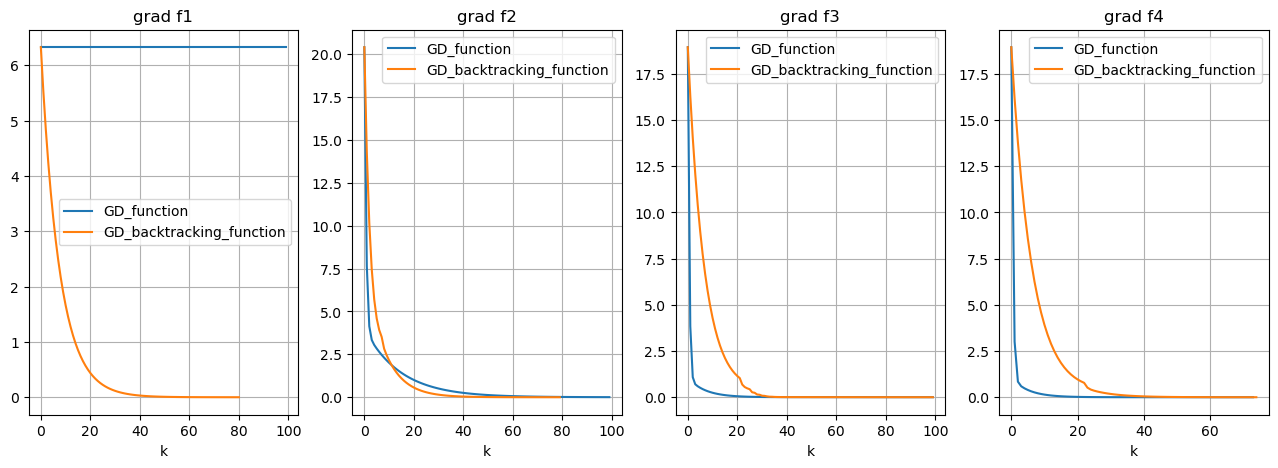

In [11]:
plt.figure(figsize=(16,5))


plt.subplot(1,4,1)
plt.plot(grand_norm1)
plt.plot(grand_norm_back1)
plt.title("grad f1")
plt.legend(["GD_function", "GD_backtracking_function"])
plt.grid()
plt.xlabel("k")

plt.subplot(1,4,2)
plt.plot(grand_norm2)
plt.plot(grand_norm_back2)
plt.title("grad f2")
plt.legend(["GD_function", "GD_backtracking_function"])
plt.grid()
plt.xlabel("k")

plt.subplot(1,4,3)
plt.plot(grand_norm3)
plt.plot(grand_norm_back3)
plt.title("grad f3")
plt.legend(["GD_function", "GD_backtracking_function"])
plt.grid()
plt.xlabel("k")

plt.subplot(1,4,4)
plt.plot(grand_norm4)
plt.plot(grand_norm_back4)
plt.title("grad f4")
plt.legend(["GD_function", "GD_backtracking_function"])
plt.grid()
plt.xlabel("k")

plt.show()

## Considerations
1. Function 1: using GD algorithm without backtracking, it's easy to find the perfect value for $\alpha$, that is $\alpha=0.5$. Indeed, using $\alpha=0.5$ the computed solution it's the same as the true solution. In this case, as we have done 0 iterations ($k=0$), the grand_norm1 vector is empty and so nothing has been plotted.

    Instead, using GD algorithm with backtracking, we are sure to converge, but we are not sure to find the optimal $\alpha$. Therefore, the value that has been found using backtracking is not optimal and we can see it from the slope of the gradient.

2. Function 2: in this case, is not easy to find the optimal $\alpha$ without backtracking. As we can see from the plot, the gradient obtained using the backtracking algorithm converges faster than the gradient computed finding $\alpha$ by hand.

3. Function 3: in this case the computation of the gradiant setting $\alpha$ by hand is better, as we can see from the plot. The gradient computed without backtracking algorithm converges faster than the other.

4. Function 4: in this case the computation of the gradiant setting $\alpha$ by hand is better, as we can see from the plot. The gradient computed without backtracking algorithm converges faster than the other.

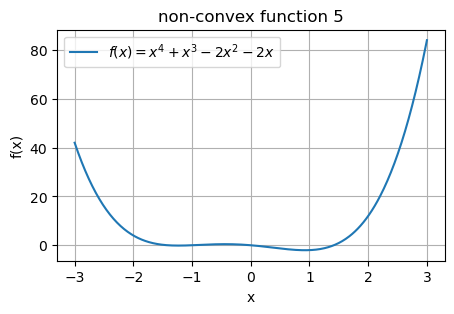

Starting from x0=-2.5, alpha=0.01: Convergence at x=-1.2325, f(x)=-0.1378 in 99 iterations
Starting from x0=-2.5, alpha=0.05: Convergence at x=-1.2322, f(x)=-0.1378 in 28 iterations
Starting from x0=-2.5, alpha=0.1: Convergence at x=0.9222, f(x)=-2.0377 in 5 iterations
Starting from x0=-1.5, alpha=0.01: Convergence at x=-1.2324, f(x)=-0.1378 in 99 iterations
Starting from x0=-1.5, alpha=0.05: Convergence at x=-1.2323, f(x)=-0.1378 in 21 iterations
Starting from x0=-1.5, alpha=0.1: Convergence at x=-1.2322, f(x)=-0.1378 in 7 iterations
Starting from x0=0, alpha=0.01: Convergence at x=0.9222, f(x)=-2.0377 in 94 iterations
Starting from x0=0, alpha=0.05: Convergence at x=0.9222, f(x)=-2.0377 in 18 iterations
Starting from x0=0, alpha=0.1: Convergence at x=0.9222, f(x)=-2.0377 in 8 iterations
Starting from x0=1, alpha=0.01: Convergence at x=0.9223, f(x)=-2.0377 in 54 iterations
Starting from x0=1, alpha=0.05: Convergence at x=0.9222, f(x)=-2.0377 in 10 iterations
Starting from x0=1, alpha=

/var/folders/xb/pnf9t16556x9d_72j9bcjl400000gn/T/ipykernel_29349/1201669596.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_val[0] = f(x0, n)
/var/folders/xb/pnf9t16556x9d_72j9bcjl400000gn/T/ipykernel_29349/1201669596.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f_val[k+1]=f(x, n)
/var/folders/xb/pnf9t16556x9d_72j9bcjl400000gn/T/ipykernel_29349/1595965635.py:39: RuntimeWarning: overflow encountered in power
  return x**4 + x**3 - 2 * (x**2) - 2 * x
/var/folders/xb/pnf9t16556x9d_72j9bcjl400000gn/T/ipykernel_29349/1595965635.py:39: RuntimeWarning: invalid value encountered in add
  return x**4 + x**3 - 2 * (x**2) - 2 * x
/var/

In [12]:
x_vals = np.linspace(-3, 3, 500)
y_vals = f_5(x_vals)

plt.figure(figsize=(5, 3))
plt.plot(x_vals, y_vals, label='$f(x) = x^4 + x^3 - 2x^2 - 2x$')
plt.title("non-convex function 5")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.legend()
plt.show()


# Initial points x0
x0_list = [np.array([-2.5]), np.array([-1.5]), np.array([0]), np.array([1]), np.array([2.5])]
alpha_list = [0.01, 0.05, 0.1]

# test different starting point x0
for x0 in x0_list:
    for alpha in alpha_list:
        x_min, k, f_vals, grad_norms = GD(f_5, grad_f5, x0, alpha)
        print(f"Starting from x0={x0[0]}, alpha={alpha}: Convergence at x={x_min[0]:.4f}, f(x)={f_5(x_min[0]):.4f} in {k} iterations")

As function 5 is a non-convex function, the choose of  $x_0$ matters. I've tried different values for $x_0$ in order to show how the choose influences the algorithm in founding the local minimum or global minimum.

From the prints, we can infer that the gradient descent converges to the global minimum at  $x = 0.9222$  (with  $f(x) = -2.0377$ ) when  $x_0$  and  $\alpha$  are chosen appropriately (for example, $x_0 = 0$ and $\alpha = 0.01$ or $\alpha = 0.05$ or $\alpha = 0.1$) to avoid convergence to the local minimum at  $x = -1.2322 $ (with  $f(x) = -0.1378$ ) or numerical instability.